# Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import datasets

In [5]:
data2021 = pd.read_csv("world-happiness-report-2021.csv")

In [264]:
data2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [265]:
data2021.drop(["Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy",
               "Explained by: Freedom to make life choices", "Explained by: Generosity", 
               "Explained by: Perceptions of corruption", "Dystopia + residual", "Ladder score in Dystopia", 
               "upperwhisker", "lowerwhisker"], axis = 1, 
              inplace = True)

Add column with A, B, C & D according to Ladder score

In [267]:
def converter(score):
    if score == 10:
        return "A++"
    elif score >= 9:
        return "A+"
    elif score >= 8:
        return "A"
    elif score >= 7:
        return "B"
    elif score >= 6:
        return "C"
    elif score >= 5:
        return "D"
    elif score < 5:
        return "F"

In [268]:
data2021["Grade"] = data2021["Ladder score"].apply(converter)

In [306]:
data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country name                    149 non-null    object 
 1   Regional indicator              149 non-null    object 
 2   Ladder score                    149 non-null    float64
 3   Standard error of ladder score  149 non-null    float64
 4   Logged GDP per capita           149 non-null    float64
 5   Social support                  149 non-null    float64
 6   Healthy life expectancy         149 non-null    float64
 7   Freedom to make life choices    149 non-null    float64
 8   Generosity                      149 non-null    float64
 9   Perceptions of corruption       149 non-null    float64
 10  Grade                           149 non-null    object 
dtypes: float64(8), object(3)
memory usage: 11.1+ KB


# Load libraries for geographical plotting

In [269]:
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

Now set up everything so that the figures show up in the notebook:

In [270]:
init_notebook_mode(connected=True) 

In [271]:
data = dict(type = 'choropleth',
            locations = data2021["Country name"],
            colorscale= 'Viridis',        
            locationmode = "country names",
            z= data2021["Ladder score"],
            colorbar = {'title' : 'Happiness score'})

In [272]:
layout = dict(
    title = "World Happiness scores 2021",
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)

In [273]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

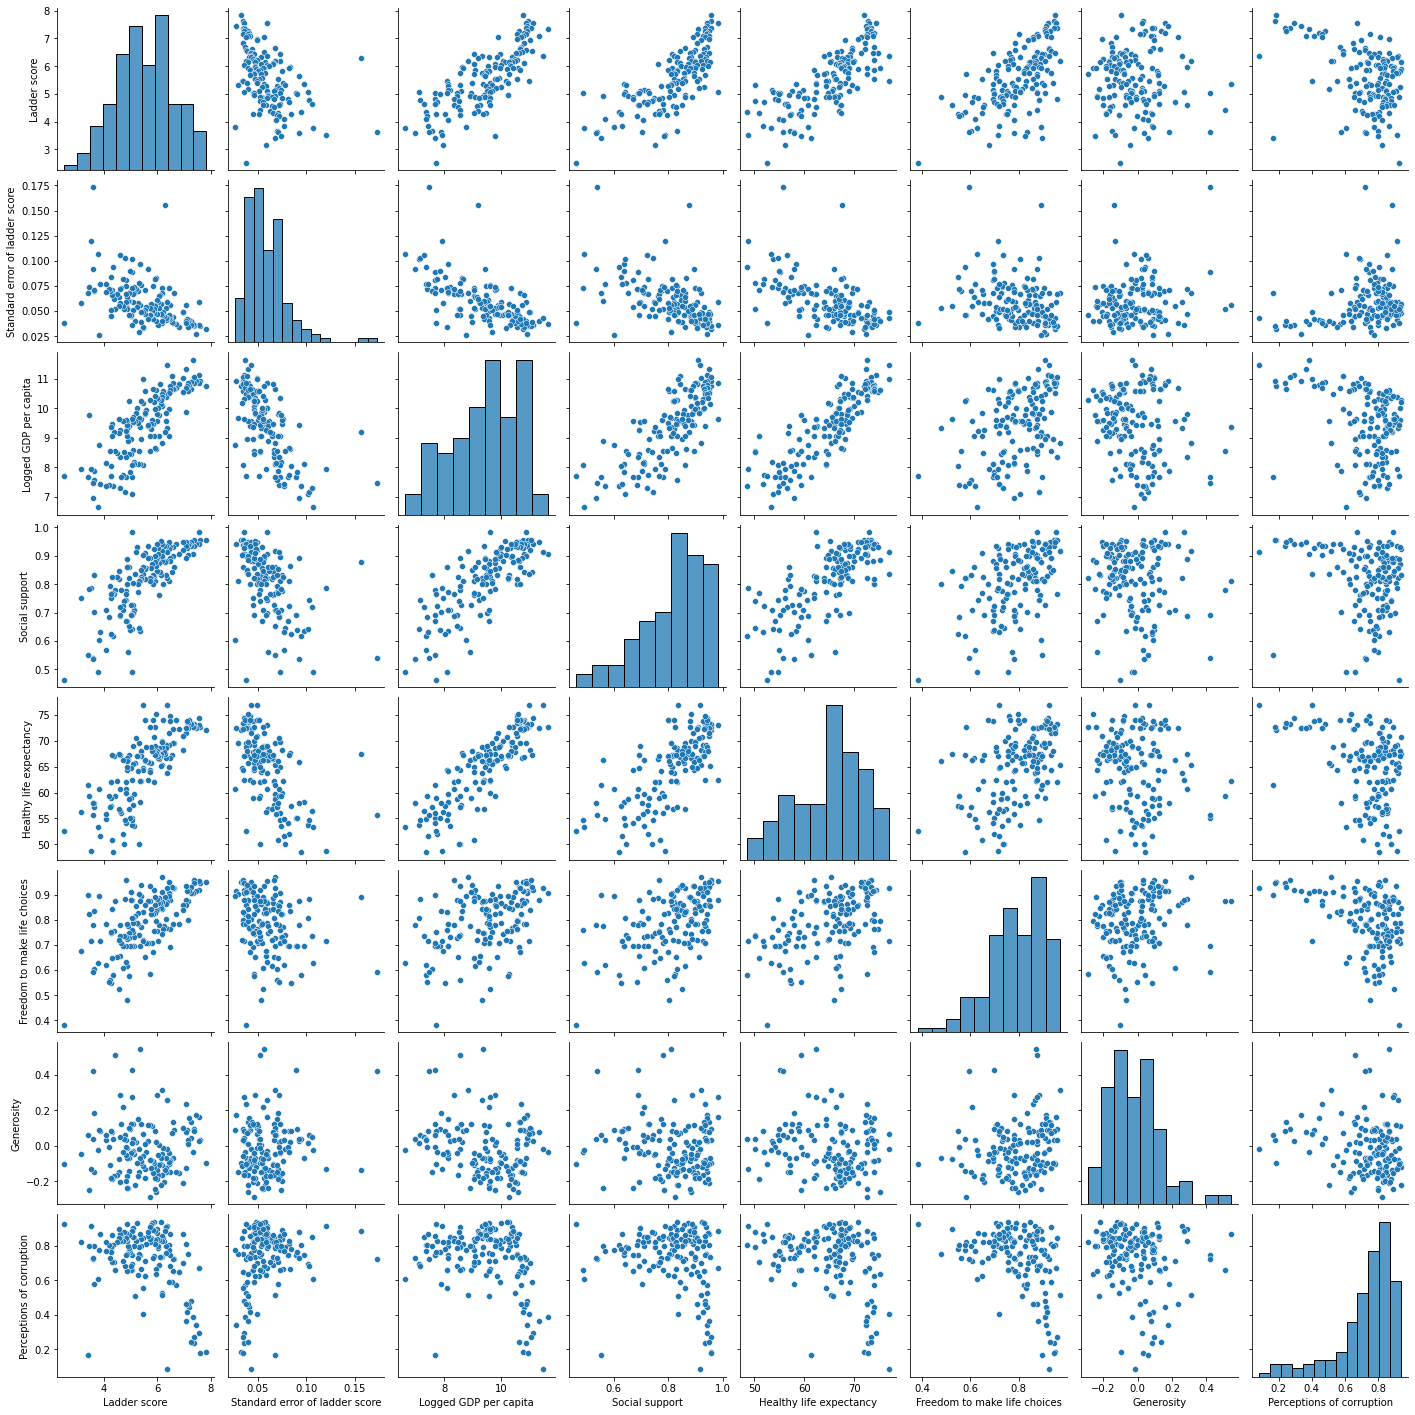

In [277]:
sns.pairplot(data2021)

In [427]:
data2021["Regional indicator"].value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

In [425]:
by_region = data2021.groupby("Regional indicator")
by_region["Ladder score"].mean()

Regional indicator
Central and Eastern Europe            5.984765
Commonwealth of Independent States    5.467000
East Asia                             5.810333
Latin America and Caribbean           5.908050
Middle East and North Africa          5.219765
North America and ANZ                 7.128500
South Asia                            4.441857
Southeast Asia                        5.407556
Sub-Saharan Africa                    4.494472
Western Europe                        6.914905
Name: Ladder score, dtype: float64

# Training and Test data

In [278]:
from sklearn.model_selection import train_test_split

In [381]:
X = data2021[["Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices",
             "Generosity", "Perceptions of corruption"]]
y = data2021["Ladder score"]

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 420)

# Training the model

Linear regression

In [383]:
from sklearn.linear_model import LinearRegression

In [384]:
lm = LinearRegression()

In [385]:
lm.fit(X_train, y_train)

LinearRegression()

In [386]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ["Coefficients"])
coeff_df

,Coefficients
Logged GDP per capita,0.293564
Social support,2.296558
Healthy life expectancy,0.027141
Freedom to make life choices,2.392059
Generosity,0.690063
Perceptions of corruption,-0.488540


In [387]:
predictions = lm.predict(X_test)

C:\Users\Quint\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Predicted Ladder score')

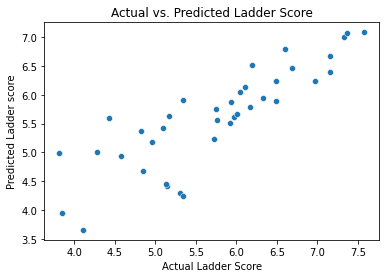

In [388]:
sns.scatterplot(y_test, predictions)
plt.title("Actual vs. Predicted Ladder Score")
plt.xlabel("Actual Ladder Score")
plt.ylabel("Predicted Ladder score")

In [380]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2:", metrics.r2_score(y_test, predictions))

MAE: 0.41718177704603193
MSE: 0.2895935501824014
RMSE: 0.53813896921
R2: 0.7045274665826365


# Classification Grades

Decision Tree Classifier

In [318]:
X = data2021.drop(["Grade", "Country name", "Regional indicator"], axis =1)
y = data2021["Grade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

In [319]:
from sklearn.tree import DecisionTreeClassifier

In [320]:
dtree = DecisionTreeClassifier()

In [321]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [323]:
predictions = dtree.predict(X_test)

In [324]:
from sklearn.metrics import classification_report,confusion_matrix

In [325]:
print(confusion_matrix(y_test, predictions))

[[ 5  0  0  0]
 [ 0 10  1  0]
 [ 0  0 13  0]
 [ 0  0  0  9]]


In [326]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00         5
           C       1.00      0.91      0.95        11
           D       0.93      1.00      0.96        13
           F       1.00      1.00      1.00         9

    accuracy                           0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38

